In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sqlalchemy import create_engine
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the CSV into a Pandas DataFrame
recipe = pd.read_csv("./Resources/recipes.csv", low_memory=False)

# Print the first five rows of data to the screen
recipe.head()

,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...


**Assess the dataset's size, columns, and the presence of null values or duplicates**

In [3]:
print('Shape:',recipe.shape) 
print('Columns:',recipe.columns)

print('Whether Null exists:\n',recipe.isna().sum())
print('Whether Duplication exists:\n',
recipe['recipe_name'].duplicated().value_counts())

Shape: (1090, 15)
Columns: Index(['Unnamed: 0', 'recipe_name', 'prep_time', 'cook_time', 'total_time',
       'servings', 'yield', 'ingredients', 'directions', 'rating', 'url',
       'cuisine_path', 'nutrition', 'timing', 'img_src'],
      dtype='object')
Whether Null exists:
 Unnamed: 0        0
recipe_name       0
prep_time        51
cook_time       308
total_time       45
servings          0
yield           211
ingredients       0
directions        0
rating            0
url               0
cuisine_path      0
nutrition         0
timing            0
img_src           0
dtype: int64
Whether Duplication exists:
 False    961
True     129
Name: recipe_name, dtype: int64


In [4]:
# Dropup null
recipe.dropna(inplace=True)

In [5]:
# Drop duplicates
recipe_nodup = recipe.drop_duplicates(subset=['recipe_name'])

In [6]:
# display information
recipe_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 1 to 1088
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    557 non-null    int64  
 1   recipe_name   557 non-null    object 
 2   prep_time     557 non-null    object 
 3   cook_time     557 non-null    object 
 4   total_time    557 non-null    object 
 5   servings      557 non-null    int64  
 6   yield         557 non-null    object 
 7   ingredients   557 non-null    object 
 8   directions    557 non-null    object 
 9   rating        557 non-null    float64
 10  url           557 non-null    object 
 11  cuisine_path  557 non-null    object 
 12  nutrition     557 non-null    object 
 13  timing        557 non-null    object 
 14  img_src       557 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 69.6+ KB


**Rename the column and Display the first few rows of the modified DataFrame**

In [7]:
recipe_nodup.rename(columns={'Unnamed: 0': 'id', 'cuisine_path': 'cuisine'}, inplace=True)
recipe_nodup.head()

,id,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine,nutrition,timing,img_src
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...
7,7,Apple-Cranberry Crisp,25 mins,40 mins,1 hrs 5 mins,8,1 8-inch crisp,"2 pounds Granny Smith apples - peeled, cored a...",Preheat the oven to 375 degrees F (190 degrees...,4.6,https://www.allrecipes.com/recipe/41893/apple-...,/Desserts/Crisps and Crumbles Recipes/,"Total Fat 12g 15%, Saturated Fat 4g 22%, Chole...","Prep Time: 25 mins, Cook Time: 40 mins, Total ...",https://www.allrecipes.com/thmb/MjDDFmBWiEx9f1...
10,10,Apple Turnovers,30 mins,25 mins,55 mins,8,8 turnovers,"2 tablespoons lemon juice, 4 cups water, 4 Gr...",Combine the lemon and 4 cups water in a large ...,4.6,https://www.allrecipes.com/recipe/59124/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 26g 33%, Saturated Fat 8g 39%, Chole...","Prep Time: 30 mins, Cook Time: 25 mins, Total ...",https://www.allrecipes.com/thmb/6EpK8eOrDHd4MM...


**How many unique cuisines?**

In [8]:
recipe_nodup['cuisine'].nunique()

244

**Which are the unique cuisines?**

In [9]:
recipe_nodup['cuisine'].unique()

array(['/Desserts/Pies/Apple Pie Recipes/',
       '/Desserts/Crisps and Crumbles Recipes/Apple Crisps and Crumbles Recipes/',
       '/Desserts/Crisps and Crumbles Recipes/',
       '/Desserts/Fruit Desserts/Apple Dessert Recipes/', '/Side Dish/',
       '/Drinks Recipes/Juice Recipes/',
       '/Desserts/Specialty Dessert Recipes/Caramel Apple Recipes/',
       '/Cuisine/European/German/',
       '/Side Dish/Sauces and Condiments/Canning and Preserving Recipes/Fruit Butter Recipes/',
       '/Bread/Quick Bread Recipes/Muffin Recipes/Apple Muffin Recipes/',
       '/Bread/Quick Bread Recipes/Fruit Bread Recipes/',
       '/Breakfast and Brunch/Pancake Recipes/Baked Pancake Recipes/',
       '/Bread/Quick Bread Recipes/', '/Bread/Yeast Bread Recipes/',
       '/Cuisine/European/Dutch/',
       '/Cuisine/European/UK and Ireland/English/',
       '/Bread/Pastries/Doughnuts/', '/Desserts/Fillings/Fruit Fillings/',
       '/Desserts/Fruit Desserts/Cherry Dessert Recipes/',
       '/Dessert

In [10]:
# Extract the cuisine information from the 'cuisine' column
recipe_nodup['cuisine'] = recipe_nodup['cuisine'].apply(lambda x: x.split('/')[1])

In [11]:
# Rerun to get the updated unique cuisines
recipe_nodup['cuisine'].unique()

array(['Desserts', 'Side Dish', 'Drinks Recipes', 'Cuisine', 'Bread',
       'Breakfast and Brunch', 'Main Dishes', 'Appetizers and Snacks',
       'Meat and Poultry', 'Sauces and Condiments', 'Seafood',
       'Soups, Stews and Chili Recipes', 'Everyday Cooking', 'Salad',
       'Soup Recipes', 'Fruits and Vegetables', 'Quick Bread Recipes',
       'BBQ & Grilling', 'Mexican', 'Holidays and Events Recipes'],
      dtype=object)

**How many entries are there for each cuisine?**

In [12]:
df= recipe_nodup['cuisine'].value_counts()
df.head()

Desserts                 232
Side Dish                 81
Bread                     50
Cuisine                   48
Appetizers and Snacks     28
Name: cuisine, dtype: int64

<Axes: >

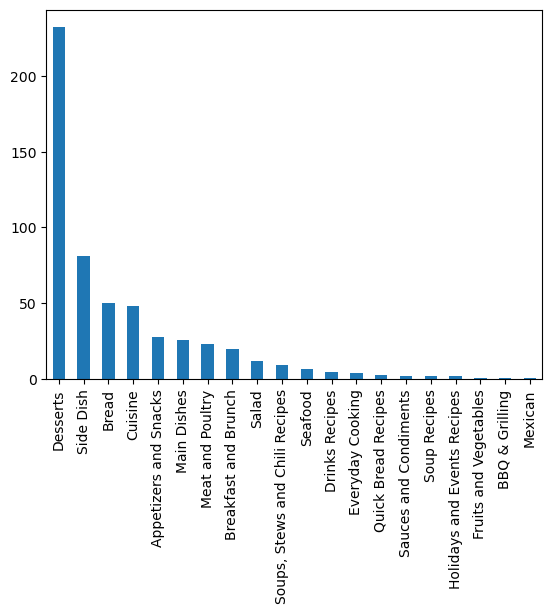

In [13]:
df.plot(kind= 'bar')

**Wordcloud for all the cuisines**

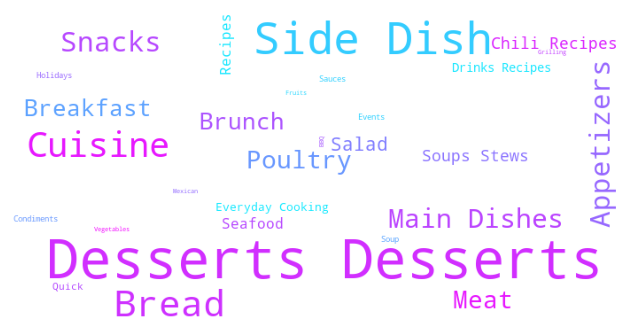

In [14]:
x= recipe_nodup['cuisine'].values

plt.subplots(figsize = (8,8))

wordcloud = WordCloud (
                    background_color = 'white',
                    width = 700,
                    height = 350,
                    colormap = 'cool').generate(' '.join(x))
plt.imshow(wordcloud) # image show
plt.axis('off') # to off the axis of x and y
plt.show()

Desserts has the highest number of entries, with side dishes following behind and so on.

## Our primary focus is on the "Desserts" category

In [15]:
# Filter the 'recipe_nodup' to select rows where the 'cuisine' column has the value 'Desserts'.
filt= recipe_nodup['cuisine'] == 'Desserts'
df_dessert= recipe_nodup[filt]

### Generate individual DataFrames for each table within the Dessert database

In [16]:
recipes_df = df_dessert[['id', 'recipe_name', 'prep_time', 'cook_time', 'total_time', 'servings', 'url', 'cuisine', 'img_src']]
ratings_df = df_dessert[['id', 'rating']]
ingredients_df = df_dessert[['id', 'ingredients']]
nutrition_df = df_dessert[['id', 'nutrition']]

#### recipes_df

In [17]:
recipes_df.head()

,id,recipe_name,prep_time,cook_time,total_time,servings,url,cuisine,img_src
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,https://www.allrecipes.com/recipe/12682/apple-...,Desserts,https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,https://www.allrecipes.com/recipe/12409/apple-...,Desserts,https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,https://www.allrecipes.com/recipe/12681/apple-...,Desserts,https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...
7,7,Apple-Cranberry Crisp,25 mins,40 mins,1 hrs 5 mins,8,https://www.allrecipes.com/recipe/41893/apple-...,Desserts,https://www.allrecipes.com/thmb/MjDDFmBWiEx9f1...
10,10,Apple Turnovers,30 mins,25 mins,55 mins,8,https://www.allrecipes.com/recipe/59124/apple-...,Desserts,https://www.allrecipes.com/thmb/6EpK8eOrDHd4MM...


**Find the maximum number of servings for plotting**

In [18]:
recipes_df['servings'].max()

100

**Custom function to convert time to minutes**

In [19]:
def convert_to_minutes(time_str):
    time_str = time_str.strip()  # Remove whitespace
    parts = time_str.split(' ')
    hours = int(parts[0].replace('hrs', '')) if 'hrs' in time_str else 0
    minutes = int(parts[-2].replace('min', '')) if 'min' in time_str else 0
    return hours * 60 + minutes

# Apply the custom function to the 'prep_time' column
recipes_df['prep_time'] = recipes_df['prep_time'].apply(convert_to_minutes)
recipes_df['cook_time'] = recipes_df['cook_time'].apply(convert_to_minutes)
recipes_df['total_time'] = recipes_df['total_time'].apply(convert_to_minutes)


recipes_df.head()

,id,recipe_name,prep_time,cook_time,total_time,servings,url,cuisine,img_src
1,1,Apple Pie by Grandma Ople,30,60,90,8,https://www.allrecipes.com/recipe/12682/apple-...,Desserts,https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
3,3,Apple Crisp,30,45,75,12,https://www.allrecipes.com/recipe/12409/apple-...,Desserts,https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20,20,160,40,https://www.allrecipes.com/recipe/12681/apple-...,Desserts,https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...
7,7,Apple-Cranberry Crisp,25,40,65,8,https://www.allrecipes.com/recipe/41893/apple-...,Desserts,https://www.allrecipes.com/thmb/MjDDFmBWiEx9f1...
10,10,Apple Turnovers,30,25,55,8,https://www.allrecipes.com/recipe/59124/apple-...,Desserts,https://www.allrecipes.com/thmb/6EpK8eOrDHd4MM...


#### ratings_df

In [20]:
# Display the first few rows of the 'ratings_df' DataFrame
ratings_df.head()

,id,rating
1,1,4.8
3,3,4.7
4,4,4.7
7,7,4.6
10,10,4.6


In [21]:
# Calculate the minimum and maximum ratings from the 'rating' column
r_min= ratings_df['rating'].min()
r_max= ratings_df['rating'].max()

print (r_min)
print(r_max)

2.0
5.0


In [22]:
# Rename the 'id' column to 'meal_id' in the 'ratings_df' DataFrame
ratings_df.rename(columns={'id': 'meal_id'}, inplace=True)


# Reorder the columns in the DataFrame
ratings_df = ratings_df[['meal_id', 'rating']]


# Display the first few rows of the updated DataFrame
ratings_df.head()

,meal_id,rating
1,1,4.8
3,3,4.7
4,4,4.7
7,7,4.6
10,10,4.6


#### nutrition_df

In [23]:
# Display the first few rows of the 'nutrition_df' DataFrame
nutrition_df.head()

,id,nutrition
1,1,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole..."
3,3,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles..."
4,4,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy..."
7,7,"Total Fat 12g 15%, Saturated Fat 4g 22%, Chole..."
10,10,"Total Fat 26g 33%, Saturated Fat 8g 39%, Chole..."


In [24]:
# Extract and convert nutrition information into separate columns
nutrition_df['protein'] = nutrition_df['nutrition'].str.extract(r'Protein (\d+\.?\d*)g', expand=True).astype(float)
nutrition_df['carbohydrate'] = nutrition_df['nutrition'].str.extract(r'Total Carbohydrate (\d+\.?\d*)g', expand=True).astype(float)
nutrition_df['fat'] = nutrition_df['nutrition'].str.extract(r'Total Fat (\d+\.?\d*)g', expand=True).astype(float)
nutrition_df['dietary_fiber'] = nutrition_df['nutrition'].str.extract(r'Dietary Fiber (\d+\.?\d*)g', expand=True).astype(float)

In [25]:
# Drop the original 'nutrition' column as it is no longer needed
nutrition_df.drop(columns=['nutrition'], inplace=True)

In [26]:
# Rename the 'id' column to 'meal_id' in the 'nutritions_df' DataFrame
nutrition_df.rename(columns={'id': 'meal_id'}, inplace=True)

# Select and reorder the columns you want to keep in the DataFrame
nutrition_df = nutrition_df[['meal_id', 'protein', 'carbohydrate', 'fat', 'dietary_fiber']]

# Display the first few rows of the updated DataFrame
nutrition_df.head()

,meal_id,protein,carbohydrate,fat,dietary_fiber
1,1,2.0,52.0,19.0,3.0
3,3,2.0,61.0,8.0,3.0
4,4,0.0,33.0,0.0,1.0
7,7,2.0,43.0,12.0,4.0
10,10,5.0,80.0,26.0,2.0


#### ingredients_df

In [27]:
ingredients_df.head()

,id,ingredients
1,1,"8 small Granny Smith apples, or as needed, ½ c..."
3,3,"10 cups all-purpose apples, peeled, cored and ..."
4,4,"18 cups thinly sliced apples, 3 tablespoons le..."
7,7,"2 pounds Granny Smith apples - peeled, cored a..."
10,10,"2 tablespoons lemon juice, 4 cups water, 4 Gr..."


#### How the individual ingredients column looks like

In [28]:
ingredients_df.loc[1,'ingredients']

'8 small Granny Smith apples, or as needed, ½ cup unsalted butter, 3 tablespoons all-purpose flour, ½ cup white sugar, ½ cup packed brown sugar, ¼ cup water, 1 (9 inch) double-crust pie pastry, thawed'

In [29]:
ingredients_df.loc[19,'ingredients']

'6  apples, 6  wooden craft sticks,   cooking spray, 1 (14 ounce) package individually wrapped caramels, unwrapped, 2 tablespoons milk'

**clean the ingredients column**

In [30]:
# Split the 'ingredients' column by ',' and then explode it into separate rows
ingredients_df['ingredients'] = ingredients_df['ingredients'].str.split(',')
ingredients_df = ingredients_df.explode('ingredients')

In [31]:
# Create a pattern to filter out non-ingredient entries
pattern = r'\d+|\d+/\d+\b.*'
ingredients_df['clean_ingredients']= ingredients_df['ingredients'].str.contains(pattern)

In [32]:
# Display the matching results
ingredients_df.head()

,id,ingredients,clean_ingredients
1,1,8 small Granny Smith apples,True
1,1,or as needed,False
1,1,½ cup unsalted butter,False
1,1,3 tablespoons all-purpose flour,True
1,1,½ cup white sugar,False


In [33]:
# Create a df for non-ingredient
filt= ingredients_df['clean_ingredients'] == False
not_ingredients_df= ingredients_df[filt]

In [34]:
# Collect unique non-ingredient values
lst= []
for index, row in not_ingredients_df.iterrows():
    if row['ingredients'] not in lst:
        lst.append(row['ingredients'])

lst

[' or as needed',
 ' ½ cup unsalted butter',
 ' ½ cup white sugar',
 ' ½ cup packed brown sugar',
 ' ¼ cup water',
 ' thawed',
 ' peeled',
 ' cored and sliced',
 ' ½ cup water',
 ' ¼ teaspoon baking powder',
 ' ¼ teaspoon baking soda',
 ' ½ cup butter',
 ' melted',
 ' ¼ teaspoon ground nutmeg',
 ' cored and thinly sliced',
 ' ¾ cup cranberries',
 ' ¼ cup white sugar',
 ' cored',
 ' and sliced',
 ' ½ teaspoon ground cinnamon',
 ' ¼ teaspoon salt',
 ' softened',
 ' ¾ cup white sugar',
 ' or more to taste',
 ' ⅛ teaspoon ground nutmeg',
 ' ½ cup raisins (Optional)',
 ' ½ cup chopped walnuts (Optional)',
 ' ½ cup all-purpose flour',
 '   cooking spray',
 ' unwrapped',
 ' and cut into chunks',
 ' or to taste',
 ' or more if needed (Optional)',
 ' ½ teaspoon ground nutmeg',
 ' ¼ cup brown sugar',
 ' cored and chopped',
 ' cored and sliced apples',
 '½ cup butter',
 ' quartered',
 ' and thinly sliced',
 ' divided',
 ' cut into small chunks',
 ' ¼ cup cornstarch',
 ' ¾ cup butter',
 ' roughly 

In [35]:
# Create a list for 'actual' non-ingredient to filter out
not_ingredients_lst=[' or as needed',' thawed', ' peeled',' cored and sliced', ' melted', ' cored and thinly sliced', 
                      ' cored',' and sliced', ' softened',' or more to taste', ' unwrapped', ' and cut into chunks',' or to taste',
                      ' or more if needed (Optional)', ' cored and chopped',' cored and sliced apples',' quartered', ' and thinly sliced',
                      ' divided', ' cut into small chunks', ' roughly chopped', '  cooking spray with flour', ' or more as needed',
                      ' cut into small pieces', ' cored and finely diced', ' drained with liquid reserved', ' pitted', ' cut into bits',
                      ' chopped', ' drained', ' drained and halved', ' room temperature',  ' with stems', ' cut into pieces', ' juiced',
                      '  nonstick cooking spray', ' at room temperature',' or as needed (Optional)', ' halved', ' beaten', ' finely chopped',
                      ' coarsely chopped', ' white part only', ' baked', '  cooking spray', ' zested and juiced', ' drained and syrup reserved',
                      ' thawed and drained',' thawed and drained',' pitted and chopped',' pitted and cut into eighths', ' halved and pitted ',
                      ' pitted and halved',' pitted and sliced',' undrained',' sliced into pats',' or more if needed',' lightly beaten',
                      ' torn into small pieces',' drained and chopped',' cored and cut in half',' chilled',' warmed',' unfolded',' and lightly rolled',
                      ' and lightly rolled',' halved and cored',' and halved',' peeled and chopped',' cored and diced',' or more as needed ', '   Reynolds® Parchment Paper',
                      '   Reynolds Wrap® Aluminum Foil', ' split lengthwise',' crushed', ' and cored', ' and diced',
                      ' pitted and sliced peaches', ' cored and sliced pears', ' frozen', ' beaten (for egg wash)',' at room temperature ',
                      ' halved and pitted',' pitted and quartered',' peeled and quartered', ' cored and sliced apple',' cored and sliced pear',' zested',
                      ' pureed',' pulp extracted', ' peeled and sliced', ' packed',' peeled and thinly sliced',' well beaten',' cooled', ' sliced', ' mashed',
                      ' peeled and seeded', ' halved lengthwise', ' smashed', ' or as desired (Optional)', ' seeded', ' peeled and pitted', ' pitted and quartered ', 
                      ' or as desired', ' cooked', ' drained and mashed', ' cooked drained and mashed', ' sliced into bite-size pieces', ' peel reserved',  ' room temperature and cut into chunks',
                      ' pitted and cut into bite-size pieces', ' or more as needed (Optional)', ' and pitted', ' separated', ' flaked coconut', ' hulled', ' hulled and quartered', ' thawed and cut into bite size pieces',
                      ' drained and rinsed']

In [36]:
# Filter the ingredients DataFrame to remove non-ingredient entries
ingredients_df= ingredients_df[~ingredients_df['ingredients'].isin(not_ingredients_lst)]

**Data Normalization and Restructuring for Ingredients DataFrame**

In [37]:
# Remove the unnecessary column and display the cleaned ingredients DataFrame
ingredients_df= ingredients_df.drop(columns=['clean_ingredients'])

# Rename the 'id' column to 'meal_id' in the 'ingredients_df' DataFrame
ingredients_df.rename(columns={'id': 'meal_id'}, inplace=True)

In [38]:
# Select and reorder the columns in the ingredients DataFrame
ingredients_df = ingredients_df[['meal_id', 'ingredients']]

ingredients_df.head()

,meal_id,ingredients
1,1,8 small Granny Smith apples
1,1,½ cup unsalted butter
1,1,3 tablespoons all-purpose flour
1,1,½ cup white sugar
1,1,½ cup packed brown sugar


**Identify the flavored ingredients used in the recipes**

In [39]:
# put unique ingredients in a list for further operations
ingredients=[]
for index, row in ingredients_df.iterrows():
    if row['ingredients'] not in ingredients:
        ingredients.append(row['ingredients'])
ingredients

['8 small Granny Smith apples',
 ' ½ cup unsalted butter',
 ' 3 tablespoons all-purpose flour',
 ' ½ cup white sugar',
 ' ½ cup packed brown sugar',
 ' ¼ cup water',
 ' 1 (9 inch) double-crust pie pastry',
 '10 cups all-purpose apples',
 ' 1 cup white sugar',
 ' 1 tablespoon all-purpose flour',
 ' 1 teaspoon ground cinnamon',
 ' ½ cup water',
 ' 1 cup quick-cooking oats',
 ' 1 cup all-purpose flour',
 ' 1 cup packed brown sugar',
 ' ¼ teaspoon baking powder',
 ' ¼ teaspoon baking soda',
 ' ½ cup butter',
 '18 cups thinly sliced apples',
 ' 3 tablespoons lemon juice',
 ' 10 cups water',
 ' 4 ½ cups white sugar',
 ' 1 cup cornstarch',
 ' 2 teaspoons ground cinnamon',
 ' 1 teaspoon salt',
 ' ¼ teaspoon ground nutmeg',
 '2 pounds Granny Smith apples - peeled',
 ' ¾ cup cranberries',
 ' ¼ cup white sugar',
 ' 1 tablespoon ground cinnamon',
 ' 1 teaspoon ground nutmeg',
 '2 tablespoons lemon juice',
 ' 4 cups water',
 ' 4  Granny Smith apples - peeled',
 ' 2 tablespoons butter',
 ' 1 cup bro

In [40]:
flavors = ['almond', 'apricot', 'banana', 'blackberries', 'blueberries', 'brandy', 'brown sugar', 'caramel', 'cardamom', 
           'cherry', 'cherries', 'chocolate', 'cinnamon', 'coconut', 'condensed milk', 'cranberries', 'date', 'fig', 'ginger', 'hazelnut', 
           'heavy cream', 'kiwifruit', 'lemon', 'lime', 'mango', 'maple syrup', 'mixed fruit', 'nutmeg', 'orange', 'peach', 'pecan', 'persimmon',
           'pineapple', 'raisin', 'raspberry', 'raspberries', 'oats', 'rum flavored extract', 'strawberry', 'strawberries', 
           'vanilla extract', 'walnut', 'watermelon']

**flavors_df**

In [41]:
# Create a regex pattern by joining the flavored ingredients with the "|" (OR) operator
pattern = '|'.join(flavors)

# Use str.contains() with the regex pattern
flavors_df = ingredients_df[ingredients_df['ingredients'].str.contains(pattern, case=False, regex=True)]

In [42]:
# Display the filtered DataFrame
flavors_df

,meal_id,ingredients
1,1,½ cup packed brown sugar
3,3,1 teaspoon ground cinnamon
3,3,1 cup quick-cooking oats
3,3,1 cup packed brown sugar
4,4,3 tablespoons lemon juice
...,...,...
1082,1082,½ cup flaked coconut
1082,1082,½ cup raisins
1082,1082,½ cup chopped walnuts
1085,1085,1 cup pitted chopped dates


**Left join flavored_df with the ratings_df and recipes_df**

In [43]:
merged_df= flavors_df.merge(ratings_df, how='left', on='meal_id')
merged_df= merged_df.merge(recipes_df[['id','total_time']], how='left', left_on='meal_id', right_on='id')
merged_df.head()

,meal_id,ingredients,rating,id,total_time
0,1,½ cup packed brown sugar,4.8,1,90
1,3,1 teaspoon ground cinnamon,4.7,3,75
2,3,1 cup quick-cooking oats,4.7,3,75
3,3,1 cup packed brown sugar,4.7,3,75
4,4,3 tablespoons lemon juice,4.7,4,160


#### flavored_ingredients_df to store the average rating and cooking time for each flavored ingredient

In [45]:
# Initialize empty lists to store results
flavor_list = []
avg_rating_list = []
avg_total_time_list = []

# Calculate averages for each ingredient
for flavor in flavors:
    filtered_df = merged_df[merged_df['ingredients'].str.contains(flavor, case=False, regex=False)]
    avg_rating = filtered_df['rating'].mean().round(2)
    avg_total_time = filtered_df['total_time'].mean().round(2)
    
    # Append results to the lists
    flavor_list.append(flavor)
    avg_rating_list.append(avg_rating)
    avg_total_time_list.append(avg_total_time)

# Create a new DataFrame to store the results
flavored_ingredients_df = pd.DataFrame({
    'ingredient': flavor_list,
    'avg_rating': avg_rating_list,
    'avg_total_time': avg_total_time_list
})

# Print the results DataFrame
print(flavored_ingredients_df)

              ingredient  avg_rating  avg_total_time
0                 almond        4.68          146.00
1                apricot        4.57          105.77
2                 banana        4.57           64.58
3           blackberries        4.73           95.00
4            blueberries        4.53           71.25
5                 brandy        4.82           99.00
6            brown sugar        4.50           87.67
7                caramel        4.40           25.00
8               cardamom        4.50          120.00
9                 cherry        4.63          188.33
10              cherries        4.60          177.39
11             chocolate        4.49           92.33
12              cinnamon        4.49           96.59
13               coconut        4.53          162.67
14        condensed milk        4.59          192.50
15           cranberries        4.60           54.29
16                  date        4.50          105.45
17                   fig        4.68          

In [ ]:
# Dictionary to map ingredient names to their singular forms
ingredient_mapping = {
    'strawberries': 'strawberry',
    'cherries': 'cherry',
    'raspberries': 'raspberry',
    'blackberries': 'blackberry',
    'blueberries': 'blueberry',
    'cranberries': 'cranberry'
}

# Replace ingredient names using the mapping dictionary
flavored_ingredients_df['ingredient'] = flavored_ingredients_df['ingredient'].replace(ingredient_mapping)

# Group by the 'Ingredient' column and calculate the average rating and cooking time
flavored_ingredients_df = flavored_ingredients_df.groupby('ingredient').agg({'avg_rating': 'mean', 'avg_total_time': 'mean'}).reset_index()

In [46]:
# Sort the DataFrame 'results_df' by the 'avg_rating' column in descending order
flavored_ingredients_df= flavored_ingredients_df.sort_values(by= 'avg_rating', ascending= False)
flavored_ingredients_df.head()

,ingredient,avg_rating,avg_total_time
26,mixed fruit,4.88,347.5
37,rum flavored extract,4.85,110.0
5,brandy,4.82,99.0
3,blackberries,4.73,95.0
0,almond,4.68,146.0


#### Connect and write DataFrames to a SQLite database named "DessertPaletteRecipesDB

In [ ]:
# engine = create_engine('sqlite:///Resources/DessertPaletteRecipesDB.db')

In [ ]:
# # Write the 'recipes_df' DataFrame to an SQLite table named 'recipes'
# recipes_df.to_sql('recipes', engine, if_exists='append', index=False)

# # Write the 'ingredients_df' DataFrame to an SQLite table named 'ingredients'
# ingredients_df.to_sql('ingredients', engine, if_exists='append', index=False)

# # Write the 'ratings_df' DataFrame to an SQLite table named 'ratings'
# ratings_df.to_sql('ratings', engine, if_exists='append', index=False)

# # Write the 'nutrition_df' DataFrame to an SQLite table named 'nutritions'
# nutrition_df.to_sql('nutrition', engine, if_exists='append', index=False)

In [ ]:
# Write the 'flavored_ingredients_df' DataFrame to an SQLite table named 'flavoredIngredients'
# flavored_ingredients_df.to_sql('flavoredIngredients', engine, if_exists='append', index=False)

In [ ]:
# engine.dispose()